# MLB Analysis

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
def lm(a):
    for i in arr:
        if i <= 0:
            arr.pop(i)
        else: i**2

## Load Data

In [3]:
df = pd.read_csv('data/2019_team_batting.csv')

In [4]:
df.head()

,Team_name,Team_url,Team_AB,Team_R,Team_H,Team_Doubles,Team_Triples,Team_HR,Team_RBI,Team_TB,Team_BB,Team_SO,Team_SB,Team_AVG,Team_OBP,Team_SLG,Team_OPS
0,Houston Astros,https://www.espn.com/mlb/team/_/name/hou/houst...,"5,613",920,"1,538",323,28,288,891,"2,781",645,"1,166",67,0.274,0.352,0.495,0.848
1,Minnesota Twins,https://www.espn.com/mlb/team/_/name/min/minne...,"5,732",939,"1,547",318,23,307,906,"2,832",525,"1,334",28,0.270,0.338,0.494,0.832
2,Boston Red Sox,https://www.espn.com/mlb/team/_/name/bos/bosto...,"5,770",901,"1,554",345,27,245,857,"2,688",590,"1,382",68,0.269,0.340,0.466,0.806
3,New York Yankees,https://www.espn.com/mlb/team/_/name/nyy/new-y...,"5,583",943,"1,493",290,17,306,904,"2,735",569,"1,437",55,0.267,0.339,0.490,0.829
4,Colorado Rockies,https://www.espn.com/mlb/team/_/name/col/color...,"5,660",835,"1,502",323,41,224,803,"2,579",489,"1,503",71,0.265,0.326,0.456,0.782


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team_name     30 non-null     object 
 1   Team_url      30 non-null     object 
 2   Team_AB       30 non-null     object 
 3   Team_R        30 non-null     int64  
 4   Team_H        30 non-null     object 
 5   Team_Doubles  30 non-null     int64  
 6   Team_Triples  30 non-null     int64  
 7   Team_HR       30 non-null     int64  
 8   Team_RBI      30 non-null     int64  
 9   Team_TB       30 non-null     object 
 10  Team_BB       30 non-null     int64  
 11  Team_SO       30 non-null     object 
 12  Team_SB       30 non-null     int64  
 13  Team_AVG      30 non-null     float64
 14  Team_OBP      30 non-null     float64
 15  Team_SLG      30 non-null     float64
 16  Team_OPS      30 non-null     float64
dtypes: float64(4), int64(7), object(6)
memory usage: 4.1+ KB


## Data Cleaning

In [6]:
def convert_strings(column):
    df[column] = df[column].str.replace(',','').astype(int)

In [7]:
convert_strings('Team_AB')

In [8]:
convert_strings('Team_H')

In [9]:
convert_strings('Team_TB')

In [10]:
convert_strings('Team_SO')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team_name     30 non-null     object 
 1   Team_url      30 non-null     object 
 2   Team_AB       30 non-null     int64  
 3   Team_R        30 non-null     int64  
 4   Team_H        30 non-null     int64  
 5   Team_Doubles  30 non-null     int64  
 6   Team_Triples  30 non-null     int64  
 7   Team_HR       30 non-null     int64  
 8   Team_RBI      30 non-null     int64  
 9   Team_TB       30 non-null     int64  
 10  Team_BB       30 non-null     int64  
 11  Team_SO       30 non-null     int64  
 12  Team_SB       30 non-null     int64  
 13  Team_AVG      30 non-null     float64
 14  Team_OBP      30 non-null     float64
 15  Team_SLG      30 non-null     float64
 16  Team_OPS      30 non-null     float64
dtypes: float64(4), int64(11), object(2)
memory usage: 4.1+ KB


In [12]:
df.Team_name

0            Houston Astros
1           Minnesota Twins
2            Boston Red Sox
3          New York Yankees
4          Colorado Rockies
5      Washington Nationals
6        Pittsburgh Pirates
7         Chicago White Sox
8            Atlanta Braves
9       Los Angeles Dodgers
10            New York Mets
11           Tampa Bay Rays
12             Chicago Cubs
13     Arizona Diamondbacks
14        Cleveland Indians
15        Oakland Athletics
16            Texas Rangers
17       Los Angeles Angels
18       Kansas City Royals
19        Milwaukee Brewers
20        Baltimore Orioles
21    Philadelphia Phillies
22      St. Louis Cardinals
23          Cincinnati Reds
24            Miami Marlins
25           Detroit Tigers
26     San Francisco Giants
27         San Diego Padres
28         Seattle Mariners
29        Toronto Blue Jays
Name: Team_name, dtype: object

In [13]:
#playoff_teams = []
#for i in df.Team_name
    #if i == ''

In [14]:
df_2 = df.drop(['Team_url', 'Team_AB'], axis=1)
df_2['Postseason'] = [1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 
                      0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
df_2.set_index('Team_name',inplace=True)
df_2.head()

,Team_R,Team_H,Team_Doubles,Team_Triples,Team_HR,Team_RBI,Team_TB,Team_BB,Team_SO,Team_SB,Team_AVG,Team_OBP,Team_SLG,Team_OPS,Postseason
Team_name,,,,,,,,,,,,,,,
Houston Astros,920,1538,323,28,288,891,2781,645,1166,67,0.274,0.352,0.495,0.848,1
Minnesota Twins,939,1547,318,23,307,906,2832,525,1334,28,0.270,0.338,0.494,0.832,1
Boston Red Sox,901,1554,345,27,245,857,2688,590,1382,68,0.269,0.340,0.466,0.806,0
New York Yankees,943,1493,290,17,306,904,2735,569,1437,55,0.267,0.339,0.490,0.829,1
Colorado Rockies,835,1502,323,41,224,803,2579,489,1503,71,0.265,0.326,0.456,0.782,0


In [16]:
postseason_teams = df_2.index[df_2['Postseason'] == True].tolist()
postseason_teams

['Houston Astros',
 'Minnesota Twins',
 'New York Yankees',
 'Washington Nationals',
 'Atlanta Braves',
 'Los Angeles Dodgers',
 'Tampa Bay Rays',
 'Oakland Athletics',
 'Milwaukee Brewers',
 'St. Louis Cardinals']

In [17]:
non_postseason_teams = df_2.index[df_2['Postseason'] == False].tolist()
non_postseason_teams

['Boston Red Sox',
 'Colorado Rockies',
 'Pittsburgh Pirates',
 'Chicago White Sox',
 'New York Mets',
 'Chicago Cubs',
 'Arizona Diamondbacks',
 'Cleveland Indians',
 'Texas Rangers',
 'Los Angeles Angels',
 'Kansas City Royals',
 'Baltimore Orioles',
 'Philadelphia Phillies',
 'Cincinnati Reds',
 'Miami Marlins',
 'Detroit Tigers',
 'San Francisco Giants',
 'San Diego Padres',
 'Seattle Mariners',
 'Toronto Blue Jays']

In [18]:
postseason = []
non_postseason = []
for team in df_2.index[df_2['Postseason']]:
    if team == True:
        postseason.append(team)
    else:
        non_postseason.append(team)
postseason

[]

## Data Exploration

In [19]:
#Set Graph Style:
plt.style.use('fivethirtyeight')

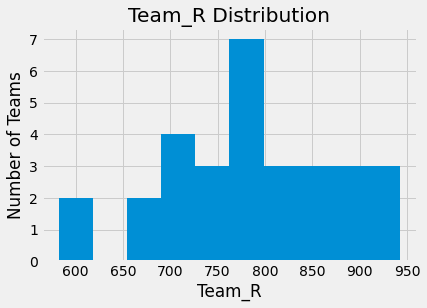

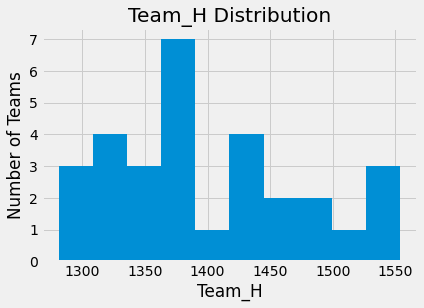

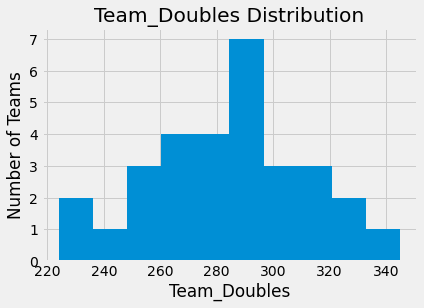

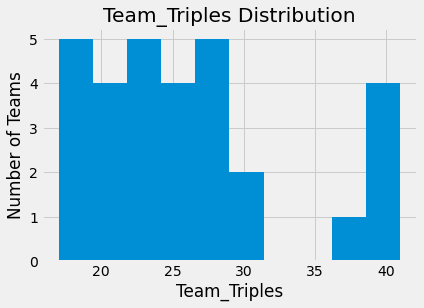

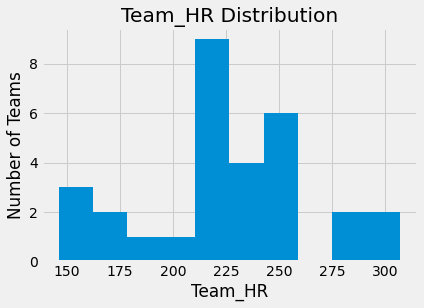

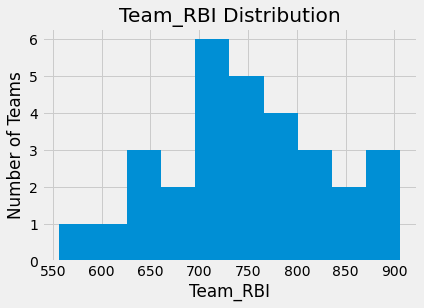

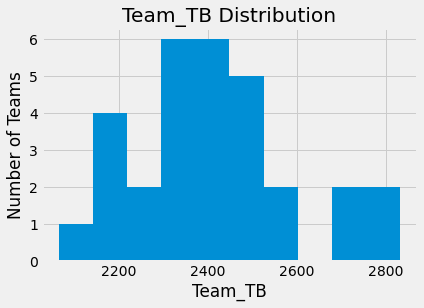

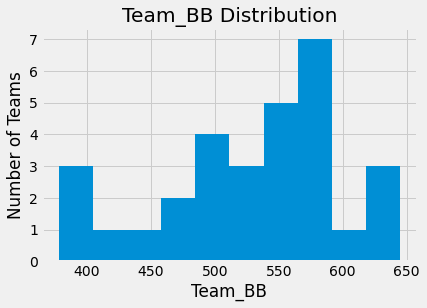

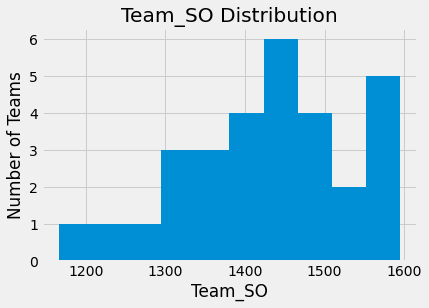

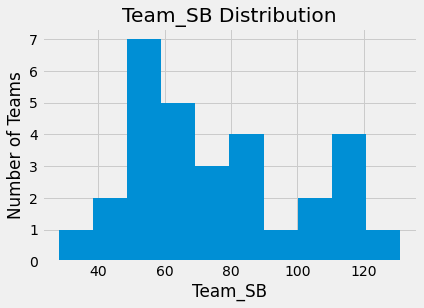

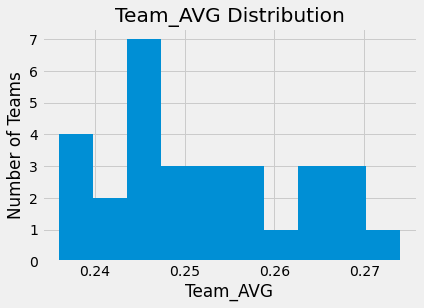

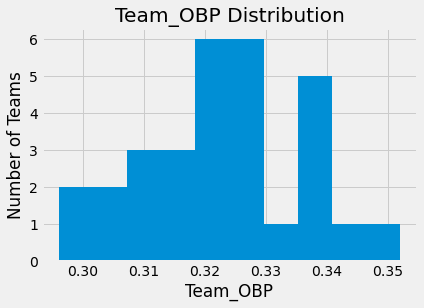

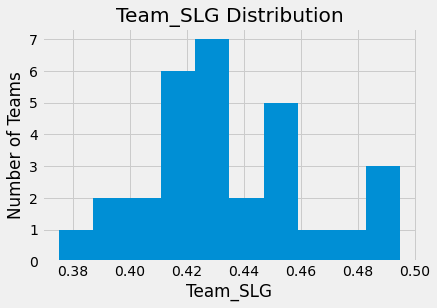

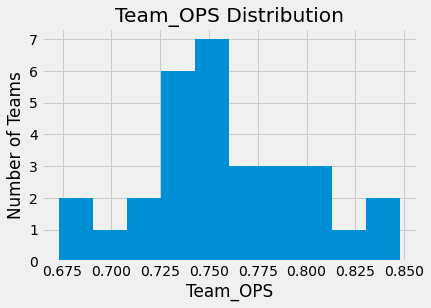

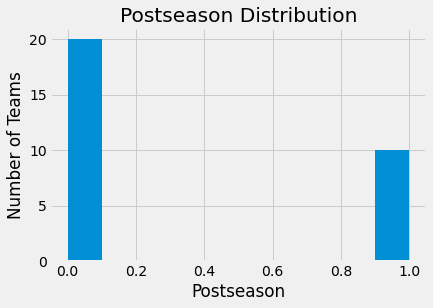

In [44]:
#Check Distributions:
for i in df_2.columns:
    plt.hist(df_2[i])
    plt.title(i + ' Distribution')
    plt.xlabel(i)
    plt.ylabel('Number of Teams')
    plt.show()

In [21]:
#Check for highly correlated features:
df_2.corr()

,Team_R,Team_H,Team_Doubles,Team_Triples,Team_HR,Team_RBI,Team_TB,Team_BB,Team_SO,Team_SB,Team_AVG,Team_OBP,Team_SLG,Team_OPS,Postseason
Team_R,1.000000,0.749116,0.546568,-0.159480,0.848417,0.996689,0.949977,0.710534,-0.478714,-0.074676,0.772809,0.934747,0.956327,0.968140,0.591731
Team_H,0.749116,1.000000,0.738095,0.132191,0.435192,0.749646,0.825576,0.206065,-0.526916,-0.242561,0.973292,0.745262,0.740110,0.756712,0.361910
Team_Doubles,0.546568,0.738095,1.000000,0.269359,0.207404,0.544938,0.613407,0.205819,-0.430560,-0.203394,0.657346,0.483351,0.513061,0.514951,0.189691
Team_Triples,-0.159480,0.132191,0.269359,1.000000,-0.399655,-0.171398,-0.096910,-0.279768,-0.032720,0.170079,0.074299,-0.145970,-0.168951,-0.164659,-0.243587
Team_HR,0.848417,0.435192,0.207404,-0.399655,1.000000,0.865720,0.853903,0.753646,-0.233182,-0.186298,0.469172,0.777271,0.910156,0.884640,0.578428
Team_RBI,0.996689,0.749646,0.544938,-0.171398,0.865720,1.000000,0.960702,0.710715,-0.473813,-0.115444,0.771187,0.933362,0.967215,0.975230,0.584484
Team_TB,0.949977,0.825576,0.613407,-0.096910,0.853903,0.960702,1.000000,0.602327,-0.440886,-0.242486,0.821011,0.892045,0.982254,0.972480,0.548663
Team_BB,0.710534,0.206065,0.205819,-0.279768,0.753646,0.710715,0.602327,1.000000,-0.281202,0.212794,0.249650,0.755387,0.670128,0.712053,0.562707
Team_SO,-0.478714,-0.526916,-0.430560,-0.032720,-0.233182,-0.473813,-0.440886,-0.281202,1.000000,0.190425,-0.560595,-0.563385,-0.420454,-0.475226,-0.258554
Team_SB,-0.074676,-0.242561,-0.203394,0.170079,-0.186298,-0.115444,-0.242486,0.212794,0.190425,1.000000,-0.188583,-0.009559,-0.199238,-0.140636,0.033192


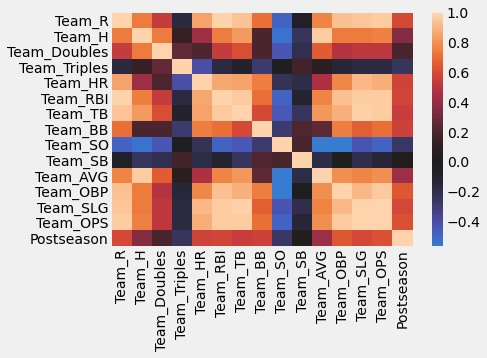

In [22]:
#Heatmap to check for highly correlated features:
sns.heatmap(df_2.corr(), center=0);

In [23]:
grouped = pd.pivot_table(df_2, index='Postseason')
grouped

,Team_AVG,Team_BB,Team_Doubles,Team_H,Team_HR,Team_OBP,Team_OPS,Team_R,Team_RBI,Team_SB,Team_SLG,Team_SO,Team_TB,Team_Triples
Postseason,,,,,,,,,,,,,,
0,0.2490,501.8,280.75,1382.1,209.1,0.31695,0.7395,745.2,713.65,75.4,0.42255,1447.05,2344.95,27.4
1,0.2585,585.9,291.60,1439.7,259.4,0.33520,0.7944,856.3,819.80,77.2,0.45890,1388.20,2556.90,23.7


In [24]:
grouped.iloc[0,:]

Team_AVG           0.24900
Team_BB          501.80000
Team_Doubles     280.75000
Team_H          1382.10000
Team_HR          209.10000
Team_OBP           0.31695
Team_OPS           0.73950
Team_R           745.20000
Team_RBI         713.65000
Team_SB           75.40000
Team_SLG           0.42255
Team_SO         1447.05000
Team_TB         2344.95000
Team_Triples      27.40000
Name: 0, dtype: float64

In [25]:
def percentage_dif(row_1,row_2):
    return round((row_1 - row_2) / row_2 * 100.0)

In [26]:
d = percentage_dif(grouped.iloc[1,:], grouped.iloc[0,:])

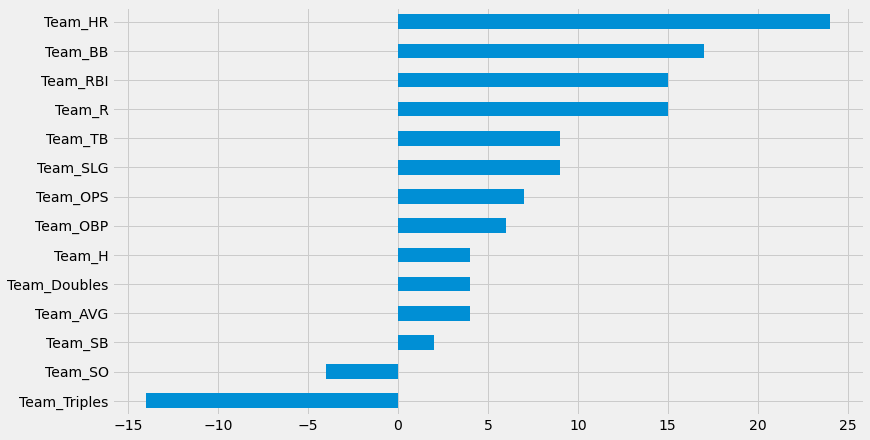

In [47]:
d.sort_values().plot(kind='barh', figsize=(12,7));

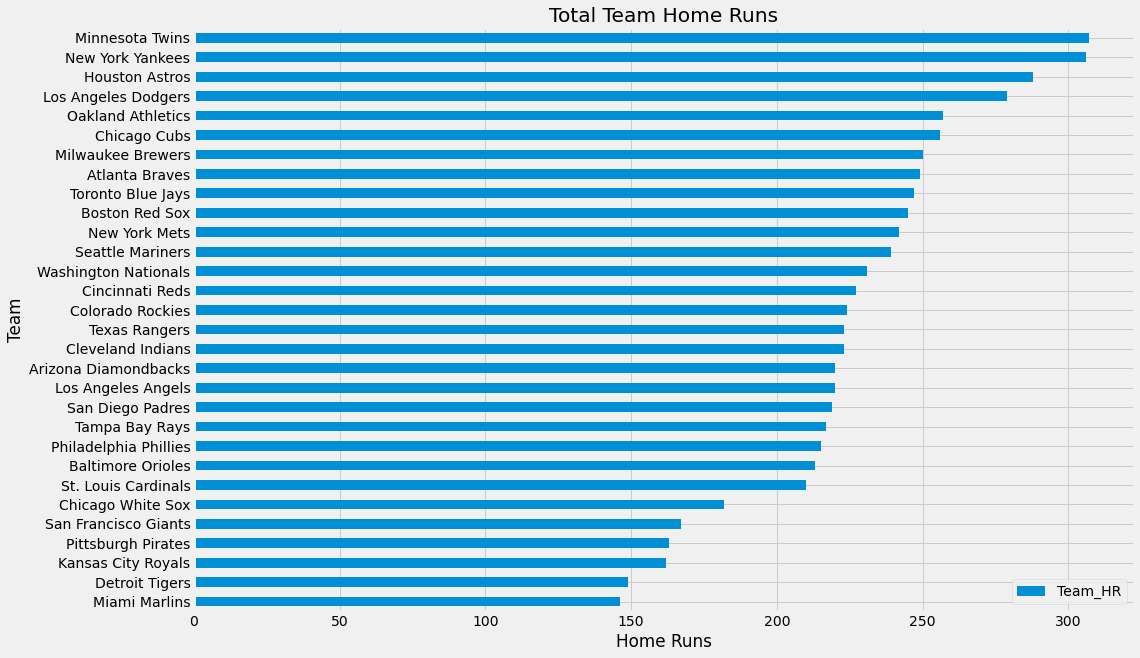

In [45]:
df_2.groupby(['Team_name'])['Team_HR'].sum().sort_values().plot(kind='barh', figsize=(15,10))
plt.title('Total Team Home Runs')
plt.xlabel('Home Runs')
plt.ylabel('Team')
plt.legend();

<ipython-input-28-18a9830e58b6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfg = df_2.groupby(['Postseason'])['Team_HR','Team_BB','Team_RBI'].mean()


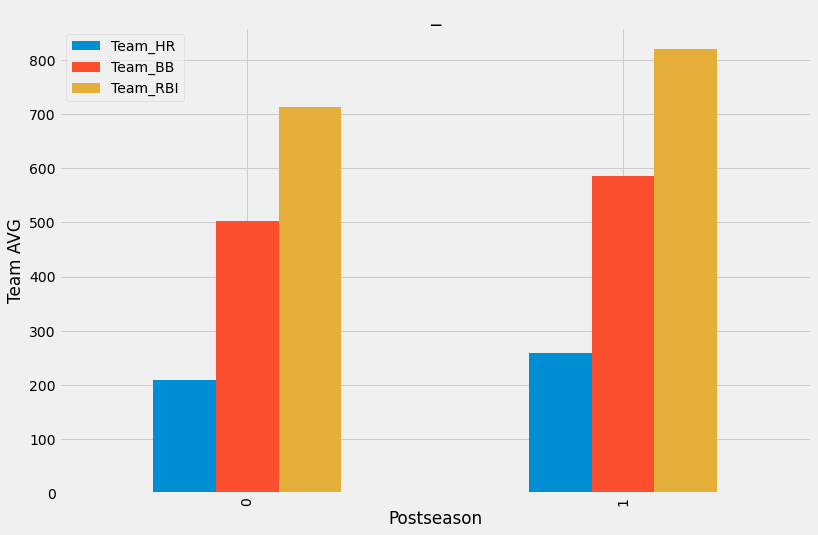

In [28]:
dfg = df_2.groupby(['Postseason'])['Team_HR','Team_BB','Team_RBI'].mean()

dfg.plot(kind='bar', title='_', ylabel='Team AVG',
         xlabel='Postseason', figsize=(12, 8));

In [41]:
#colors = ['r' if (bar == df_2['Postseason']==True) else 'grey' for bar in df_2['Postseason']]
#plt.bar(x=df['Year'], height=df['Total'], color=colors)

#plt.barh(x=df_2.index, height=df_2['Team_HR'])
#plt.show()

In [50]:
def boxplot(y):
    sns.boxplot(x='Postseason', y=y, data=df_2);

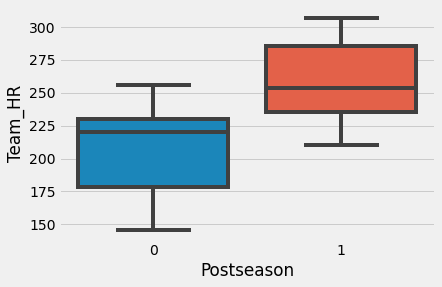

In [51]:
boxplot('Team_HR')

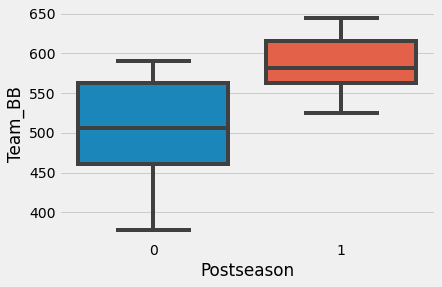

In [38]:
boxplot('Team_BB')

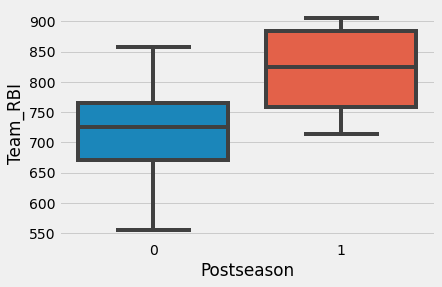

In [39]:
boxplot('Team_RBI')

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x color="red")
ax.plot(

## Data Pre-processing

### Train-Test Split Data

### Scale Data

### One Hot Encode Data

### Label Encode Data

### Mappings

## Model A - Logistic Regression